 # MP1 - ECE 498:  Data Science & Analytics
 
 
 # Group members (NetIDs): 
    
 ##   Akhilesh Somani (somani4)
 ##   Gowtham Kuntumalla (gowtham4)
 ##   Manan Mehta (mananm2)

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np  
from datetime import datetime
from scipy import stats as st

# to handle file imports for different OS
import os
from pathlib import Path 

# ----------------------------- Task 0 -----------------------------

In [2]:
folder = Path(os.getcwd())
file1 = folder / 'mp1_av_disengagements.csv'
file2 = folder / 'mp1_av_totalmiles.csv'
dseng_df = pd.read_csv(file1)
summary_month_df = pd.read_csv(file2)

In [3]:
dseng_df.head()

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions


In [4]:
summary_month_df.head()

,Month,Car,miles driven in autonomous mode,total number of disengagements,number of automatic disengagements,number of manual disengagements
0,14-Sep,WDD2221851A001072,4207,44,24,20
1,14-Oct,WDD2221851A001072,23971,228,100,128
2,14-Nov,WDD2221851A001072,15837,141,66,75
3,14-Dec,WDD2221851A001072,9413,36,15,21
4,15-Jan,WDD2221851A001072,18192,48,18,30


### 0.2 (a) Total number of AV disengagements: 1024

In [5]:
dseng_df.count()

Month            1024
Car              1024
Location         1024
Weather          1024
TypeOfTrigger    1024
ReactionTime      492
Cause            1024
dtype: int64

### 0.2 (b) Number of unique months that have recorded AV disengagements: 15

In [6]:
dseng_df['Month_actual'] = dseng_df['Month'].apply(lambda x:x.split("-")[1])

In [7]:
dseng_df['Month'].nunique()

15

### 0.2 (c) List of unique locations of AV disengagements: 2

In [8]:
dseng_df['Location'].nunique()

2

### 0.2 (d) Number of unique causes for AV disengagements: 10 

In [9]:
dseng_df['Cause'].nunique()

10

### 0.2 (e) ReactionTime has 532 missing values because Manual Trigger

In [10]:
dseng_df.isnull().sum()

Month              0
Car                0
Location           0
Weather            0
TypeOfTrigger      0
ReactionTime     532
Cause              0
Month_actual       0
dtype: int64

### 0.3 The top two leading causes of disengagement: Recklessly behaving agent and Unwanted Driver Discomfort

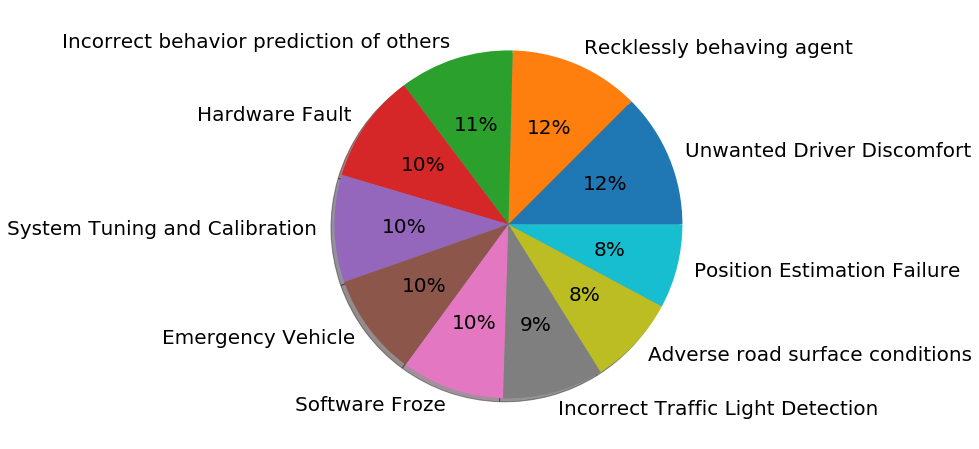

In [11]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
import matplotlib as mpl
mpl.rcParams['font.size'] = 20.0

causes = dseng_df['Cause'].value_counts()
causes = causes[causes>10]
patches, texts, _ = plt.pie(causes, 
        # grab labels from frame keys
        labels=causes.keys(),
        # some formatting
        autopct='%.0f%%', shadow=True)
#plt.legend(patches, labels=causes.keys(), bbox_to_anchor=(0.85,1.025),loc="upper left")
#plt.axis('equal')
plt.show()

### 0.4 AVs are indeed maturing over time

In [12]:
#disengagement/mile
summary_month_df['total disengagements per mile'] = summary_month_df['total number of disengagements']\
/summary_month_df['miles driven in autonomous mode']

#print(summary_month_df['total disengagement per mile'])

summary_month_df.iloc[:15,:].plot(x = 'Month',y = 'total disengagement per mile')
plt.xlabel('Month')
plt.ylabel('# disengagement/mile')
plt.title('Car 1')
plt.show()

KeyError: 'total disengagement per mile'

# ----------------------------- Task 1 -----------------------------

### 1.1 Various distributions:

#### a. Gaussian distribution : 
Also called normal distribution, samples drawn from it follow the general distribution which is given by 
$$ {\ f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}} $$

Samples drawn are likely to be close to the mean. and those far away are less likely.

#### b. Exponential distribution:
Here the general distribution is given by 
$$ f(x;\lambda) = \begin{cases}
\lambda e^{-\lambda x} & x \ge 0, \\
0 & x < 0.
\end{cases} $$

Samples drawn are likely to be close to Zero. Another key property is memorylessness. i.e. conditional probabability boils down to simple exponentials (only the time period matters not when it starts).

#### c. Weibull distribution:

Here the general distribution is given by 
$$ 
f(x;\lambda,k) =
\begin{cases}
\frac{k}{\lambda}\left(\frac{x}{\lambda}\right)^{k-1}e^{-(x/\lambda)^{k}} & x\geq0 ,\\
0 & x<0,
\end{cases} $$

It is a generalisation of standard exponential distribution (k = 1). 

If X = time-to-failure, then k < 1 indicates failure rate goes down as parts life increases, i.e. probaility that samples fail is very high when X is close to zero and then it decreases. Vice versa for k > 1.


### 1.2 Reaction times of drivers

In [ ]:

""" Actual PDF of reaction times using histograms """ 
plt.figure(figsize = (10,6))

reaction_t = dseng_df['ReactionTime'].dropna()
reaction_t.plot(kind='hist', bins  = 250, density = True, alpha=0.3, color = 'blue', label = 'Orig_data')

"""fitting scikit-learn stats model  """ 

x_data = sorted(reaction_t)
# normal
mean, var = st.norm.fit(x_data)
plt.plot(x_data, st.norm.pdf(x_data,mean,var), label = 'Normal')

# exponential
loc, scale = st.expon.fit(x_data)
plt.plot(x_data, st.expon.pdf(x_data,loc, scale), label = 'Exponential')

# weibull

args = st.exponweib.fit(x_data)
plt.plot(x_data, st.exponweib.pdf(x_data,*args), label = 'Weibull')
print("In Weibull distribution fit, k value is {0}".format(round(list(args)[1],2)))

plt.xlabel('Reaction times (sec)')
plt.ylabel('Frequency')
plt.title('PDF of Reaction Times Normalized')
plt.legend(frameon = False, loc = 'best')
plt.show()
 

### Observation: We see that the weibull distribution fits well. Parameter 'k' < 1 so the reaction times are largely populated in the beginning and go down with time.

### 1.3 Average Reaction Times

In [ ]:
print("1.3(a) Average Reaction Time for entire data set = {0} sec \n\n".format(round(reaction_t.mean(),2)))

print("1.3(b) Average Reaction Time (sec) by \n")
print( round(dseng_df['ReactionTime'].groupby(dseng_df['Location']).mean(),2))


### 1.4 Hypothesis testing of reaction times 

Define 

H0 : AV_mean = 1.09 sec

H1 : AV_mean != 1.09 sec

Significance level  = 0.05

We will apply a two tail test asssuming H0 is true. We will test if 0.93 sec is in statistical limits of assumed population mean (= 1.09 sec)


### 1.5 PDF of Disengagements/mile with monthly granularity

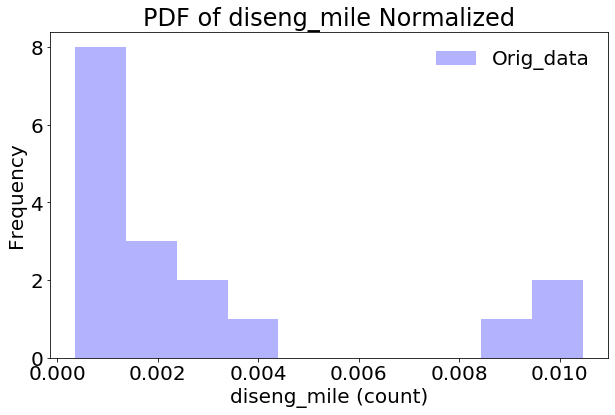

In [13]:


""" Actual PDF of reaction times using histograms """ 
plt.figure(figsize = (10,6))

diseng_mile = summary_month_df['total disengagements per mile'].dropna()
diseng_mile.plot(kind='hist', bins = 10, alpha = 0.3, color = 'blue', label = 'Orig_data')

"""fitting scikit-learn stats model  """ 

x_data = sorted(diseng_mile)

# normal
#plt.plot(x_data, st.norm.pdf(x_data, *st.norm.fit(x_data)), label = 'Normal')

# exponential
#plt.plot(x_data, st.expon.pdf(x_data, *st.expon.fit(x_data)), label = 'Exponential')

# weibull

#plt.plot(x_data, st.exponweib.pdf(x_data, *st.exponweib.fit(x_data)), label = 'Weibull')
#print("In Weibull distribution fit, k value is {0}".format(round(list(args)[1],2)))

plt.xlabel('diseng_mile (count)')
plt.ylabel('Frequency')
plt.title('PDF of diseng_mile Normalized')
plt.legend(frameon = False, loc = 'best')
plt.show()

# ----------------------------- Task 2 -----------------------------

# ----------------------------- Task 3 -----------------------------